# Mean, Median, Mode

## Mean vs. Median

Let's create some fake income data, centered around 27,000 with a normal distribution and standard deviation of 15,000, with 10,000 data points. (We'll discuss those terms more later, if you're not familiar with them.)

Then, compute the mean (average) - it should be close to 27,000:

In [3]:
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
np.mean(incomes)

26882.145870158791

We can segment the income data into 50 buckets, and plot it as a histogram:

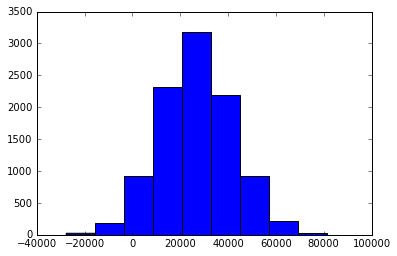

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(incomes, 10)
plt.show()

Now compute the median - since we have a nice, even distribution it too should be close to 27,000:

In [5]:
np.median(incomes)

26647.65877059794

Now we'll add Donald Trump into the mix. Darn income inequality!

In [6]:
incomes = np.append(incomes, [1000000000])

The median won't change much, but the mean does:

In [7]:
np.median(incomes)

26648.597828497859

In [8]:
np.mean(incomes)

126869.45892426636

## Mode

Next, let's generate some fake age data for 500 people:

In [9]:
ages = np.random.randint(18, high=90, size=500)
ages

array([60, 88, 83, 87, 54, 36, 36, 77, 66, 84, 69, 60, 61, 34, 59, 80, 33,
       35, 37, 84, 40, 66, 40, 29, 41, 27, 88, 23, 83, 66, 24, 43, 36, 60,
       39, 53, 65, 71, 70, 58, 43, 37, 72, 33, 57, 23, 34, 22, 29, 76, 74,
       50, 40, 22, 70, 41, 75, 47, 29, 87, 36, 52, 59, 47, 37, 75, 21, 46,
       51, 34, 77, 23, 75, 60, 58, 38, 88, 43, 34, 53, 27, 25, 74, 84, 39,
       69, 41, 69, 65, 69, 43, 61, 58, 31, 62, 41, 76, 26, 38, 60, 31, 46,
       82, 54, 46, 88, 37, 72, 21, 52, 30, 32, 55, 79, 60, 66, 33, 49, 42,
       68, 81, 84, 80, 33, 83, 43, 24, 38, 28, 56, 85, 21, 44, 38, 86, 88,
       68, 57, 54, 73, 59, 19, 35, 70, 60, 71, 79, 26, 83, 58, 42, 64, 44,
       82, 51, 88, 28, 25, 74, 82, 26, 81, 49, 40, 80, 74, 31, 65, 73, 72,
       66, 28, 80, 68, 66, 60, 28, 69, 67, 27, 25, 18, 25, 22, 36, 55, 19,
       23, 79, 62, 72, 24, 75, 48, 71, 76, 23, 45, 86, 85, 70, 88, 78, 26,
       43, 24, 78, 41, 33, 48, 46, 39, 46, 59, 84, 53, 39, 88, 36, 59, 27,
       41, 34, 20, 38, 88

In [10]:
from scipy import stats
stats.mode(ages)

ModeResult(mode=array([60]), count=array([17]))

# Moments: Mean, Variance, Skew, Kurtosis

Create a roughly normal-distributed random set of data:

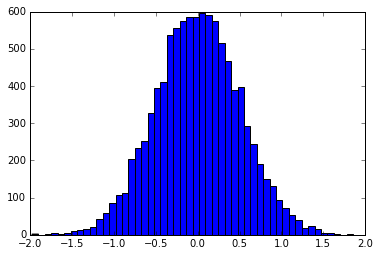

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

The first moment is the mean; this data should average out to about 0:

In [13]:
np.mean(vals)

-0.001768666050853102

The second moment is the variance:

In [14]:
np.var(vals)

0.25410967053526134

The third moment is skew - since our data is nicely centered around 0, it should be almost 0:

In [15]:
import scipy.stats as sp
sp.skew(vals)

0.010188626460633314

The fourth moment is "kurtosis", which describes the shape of the tail. For a normal distribution, this is 0:

In [16]:
sp.kurtosis(vals)

0.010163288319797292

# Standard Deviation and Variance

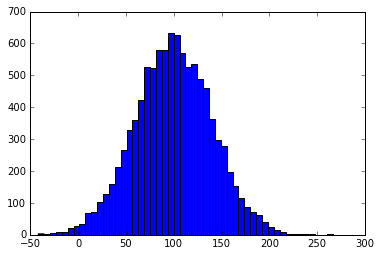

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 40.0, 10000)

plt.hist(incomes, 50)
plt.show()

In [18]:
incomes.std()

39.986719568424668

In [19]:
incomes.var()

1598.9377418438364

# Percentiles

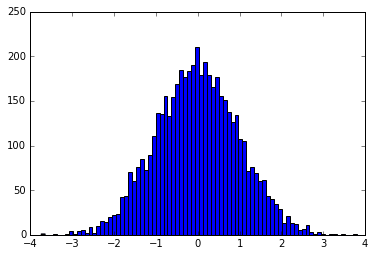

In [42]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
vals = np.random.normal(0, 1.0, 5000)

plt.hist(vals, 80)
plt.show()

In [43]:
np.percentile(vals, 50)

-0.021890572467302721

In [44]:
np.percentile(vals, 90)

1.2609049807742552

In [45]:
np.percentile(vals, 20)

-0.85747676166464404

In [46]:
np.median(vals)

-0.021890572467302721

# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

0.49663566641985291

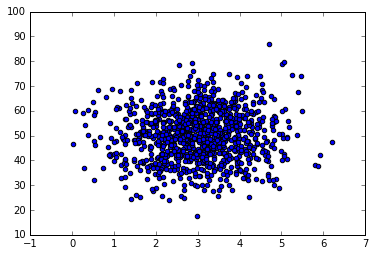

In [1]:
%matplotlib inline

import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)


Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

-21.584628386696338

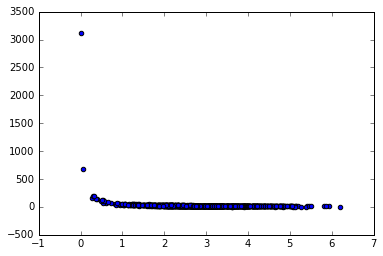

In [2]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [4]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

-0.21226755018964777

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [5]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.21205528],
       [-0.21205528,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

-1.0010010010010013

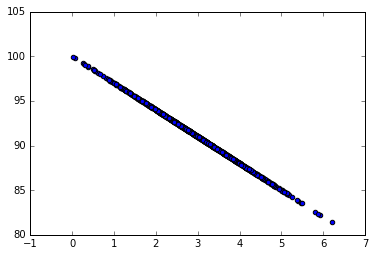

In [7]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation(pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

# T-Tests and P-Values

In [1]:
import numpy as np
from scipy import stats

A = np.random.normal(25.0, 5.0, 10000)
B = np.random.normal(26.0, 5.0, 10000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=-12.972169229788987, pvalue=2.5127977974303333e-38)

In [2]:
B = np.random.normal(25.0, 5.0, 10000)

stats.ttest_ind(A, B)

Ttest_indResult(statistic=1.0658712096725931, pvalue=0.28649473324177416)

In [3]:
stats.ttest_ind(A, A)

Ttest_indResult(statistic=0.0, pvalue=1.0)